In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [343]:
#import data from .csv file
weather = pd.DataFrame(pd.read_csv("Weather Dataset.csv"))
weather.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1/1/2015,0.14300,0.10950,0.12600,5.60,1.75,0.75,40.75,...,296.8,282.67500,296.725,4.350000,1.275001,-2.599999,-6.600,-3.925,-3.200000,-9999.0
1,30.0,70.0,1/2/2015,0.02925,0.02450,0.06525,8.40,20.50,19.00,34.50,...,296.8,284.15000,296.700,12.125002,5.850001,-1.749999,-5.075,-3.975,-2.200000,-9999.0
2,30.0,70.0,1/3/2015,0.18125,0.16325,0.10375,11.35,29.50,46.50,41.00,...,296.8,284.67500,296.600,26.575000,10.875000,0.775001,-13.925,-5.725,-0.874999,-9999.0
3,30.0,70.0,1/4/2015,0.12350,0.07725,-0.09000,12.40,36.50,38.75,40.50,...,296.8,285.15002,296.550,35.949997,18.375000,1.325000,-20.400,-6.050,2.925002,-9999.0
4,30.0,70.0,1/5/2015,-0.04575,0.04225,0.01700,11.25,20.75,22.25,38.75,...,296.8,285.75000,296.500,40.700000,17.400002,3.175001,-7.900,-6.550,1.575000,-9999.0


In [344]:
m = len(weather)
m

17902

In [345]:
weather.shape

(17902, 21)

In [346]:
#Training and Testing Splitting
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(weather, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape

(12531, 21)

In [347]:
df_test.shape

(5371, 21)

In [348]:
num_vars = ['lat', 'lon','omega_x', 'omega_y', 'omega', 'pr_wtr', 'rhum_x','rhum_y', 'rhum', 'slp', 'tmp_x', 'tmp_y', 'tmp','uwnd_x', 'uwnd_y', 'uwnd', 'vwnd_x', 'vwnd_y', 'vwnd','rain']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
6643,27.5,70.0,0.01800,0.05875,0.04075,44.225000,42.75,34.00,58.75,100162.5,297.7,308.575,301.67502,0.500000,-4.224999,2.925001,4.675000,-1.599999,3.875001,0.0
7858,27.5,72.5,0.06475,0.01100,-0.02200,7.625000,14.00,15.50,10.50,101892.5,296.7,284.875,298.34998,4.100001,6.775000,0.725001,-3.525000,-3.100000,-0.400000,0.0
12706,25.0,70.0,0.06075,-0.05575,-0.09500,34.324997,4.75,39.25,23.75,99580.0,299.6,310.900,301.40000,6.275000,5.500001,11.150000,-12.025000,-4.974999,0.250001,-9999.0
6830,27.5,70.0,-0.11150,0.04575,0.10000,13.475000,69.75,13.00,34.25,101855.0,297.7,285.125,297.42502,27.300000,15.250002,1.750001,26.349998,10.000000,-3.450000,0.0
12965,25.0,72.5,-0.00200,-0.02275,-0.08225,23.500000,36.25,30.50,32.75,100890.0,297.6,304.825,296.50000,12.200001,9.400002,5.125001,4.800000,1.275000,2.250001,0.0


In [349]:
df_Newtrain.shape

(12531, 20)

In [350]:
y_Newtrain = df_Newtrain.pop('rain')
X_Newtrain = df_Newtrain

In [351]:
X_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
6643,27.5,70.0,0.01800,0.05875,0.04075,44.225000,42.75,34.00,58.75,100162.5,297.7,308.575,301.67502,0.500000,-4.224999,2.925001,4.675000,-1.599999,3.875001
7858,27.5,72.5,0.06475,0.01100,-0.02200,7.625000,14.00,15.50,10.50,101892.5,296.7,284.875,298.34998,4.100001,6.775000,0.725001,-3.525000,-3.100000,-0.400000
12706,25.0,70.0,0.06075,-0.05575,-0.09500,34.324997,4.75,39.25,23.75,99580.0,299.6,310.900,301.40000,6.275000,5.500001,11.150000,-12.025000,-4.974999,0.250001
6830,27.5,70.0,-0.11150,0.04575,0.10000,13.475000,69.75,13.00,34.25,101855.0,297.7,285.125,297.42502,27.300000,15.250002,1.750001,26.349998,10.000000,-3.450000
12965,25.0,72.5,-0.00200,-0.02275,-0.08225,23.500000,36.25,30.50,32.75,100890.0,297.6,304.825,296.50000,12.200001,9.400002,5.125001,4.800000,1.275000,2.250001


In [352]:
y_Newtrain.head()

6643        0.0
7858        0.0
12706   -9999.0
6830        0.0
12965       0.0
Name: rain, dtype: float64

In [353]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [    0.     0. -9999.     0.     0.     0. -9999.     0.     0.     0.]


In [354]:
# training set preparation

X1 = df_Newtrain.values[:, 0]    
X2 = df_Newtrain.values[:, 1]             
X3 = df_Newtrain.values[:, 2]               
X4 = df_Newtrain.values[:, 3]           
X5 = df_Newtrain.values[:, 4]    
X6 = df_Newtrain.values[:, 5] 
X7 = df_Newtrain.values[:, 6] 
X8 = df_Newtrain.values[:, 7] 
X9 = df_Newtrain.values[:, 8] 
X10 = df_Newtrain.values[:, 9] 
X11 = df_Newtrain.values[:, 10] 
X12 = df_Newtrain.values[:, 11] 
X13 = df_Newtrain.values[:, 12] 
X14 = df_Newtrain.values[:, 13] 
X15 = df_Newtrain.values[:, 14] 
X16 = df_Newtrain.values[:, 15] 
X17 = df_Newtrain.values[:, 16] 
X18 = df_Newtrain.values[:, 17] 
X19 = df_Newtrain.values[:, 18] 

In [355]:
m = len(X_Newtrain)       
X_0 = np.ones((m, 1))       # Single column matrix with all ones 
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [356]:
# 1D arrays to 2D array conversion
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)
X_12 = X12.reshape(m, 1)
X_13 = X13.reshape(m, 1)
X_14 = X14.reshape(m, 1)
X_15 = X15.reshape(m, 1)
X_16 = X16.reshape(m, 1)
X_17 = X17.reshape(m, 1)
X_18 = X18.reshape(m, 1)
X_19 = X19.reshape(m, 1)

In [357]:
# Final X Matrix for training
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19))

In [358]:
theta = np.zeros(20)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [359]:
y_Newtest = df_Newtest.pop('rain')
X_Newtest = df_Newtest

In [360]:
X_Newtest.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
1369,30.0,70.0,0.03800,0.00400,-0.02300,13.300001,7.25,52.25,15.00,100785.0,296.8,301.57498,302.2,11.225000,0.700001,1.925001,0.175,-1.400000,1.375000
4780,30.0,77.5,-0.03975,-0.14600,-0.13375,17.200000,23.00,40.00,19.75,100545.0,293.2,304.62500,293.9,1.525000,5.025001,2.925000,3.900,2.625000,1.050000
9383,27.5,75.0,-0.02500,-0.11925,-0.11975,13.775000,15.50,55.75,24.25,100610.0,296.2,290.70000,293.8,41.950000,11.350001,1.750001,-7.325,3.600000,1.775000
12314,25.0,70.0,0.01125,0.03025,-0.06725,35.700000,9.50,31.75,42.25,100220.0,299.6,309.45000,299.8,17.600002,7.450002,6.525002,6.900,0.100001,0.750001
11919,25.0,70.0,-0.04375,-0.02400,-0.03825,34.975002,13.50,10.50,56.75,100490.0,299.6,305.72498,298.2,14.250000,5.850000,6.250002,5.475,3.225000,2.975001


In [361]:
y_Newtest.head()

1369    -9999.0
4780        0.0
9383        0.0
12314   -9999.0
11919   -9999.0
Name: rain, dtype: float64

In [362]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [-9999.     0.     0. -9999. -9999. -9999.     0.     0.     0.     0.]


In [363]:
# testing/validarion set preparation
X1_test = df_Newtest.values[:, 0]                
X2_test = df_Newtest.values[:, 1]                 
X3_test = df_Newtest.values[:, 2]               
X4_test = df_Newtest.values[:, 3]               
X5_test = df_Newtest.values[:, 4]     
X6_test = df_Newtest.values[:, 5]
X7_test = df_Newtest.values[:, 6]
X8_test = df_Newtest.values[:, 7]
X9_test = df_Newtest.values[:, 8]
X10_test = df_Newtest.values[:, 9]
X11_test = df_Newtest.values[:, 10]
X12_test = df_Newtest.values[:, 11]
X13_test = df_Newtest.values[:, 12]
X14_test = df_Newtest.values[:, 13]
X15_test = df_Newtest.values[:, 14]
X16_test = df_Newtest.values[:, 15]
X17_test = df_Newtest.values[:, 16]
X18_test = df_Newtest.values[:, 17]
X19_test = df_Newtest.values[:, 18]


print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])

X1_test =  [30.  30.  27.5 25.  25.  25.  30.  27.5 27.5 27.5]
X2_test =  [70.  77.5 75.  70.  70.  70.  75.  70.  75.  75. ]
X3_test =  [ 0.038      -0.03975    -0.025       0.01125    -0.04375    -0.03475
  0.03825     0.212       0.22749999  0.239     ]


In [364]:
m_test = len(X_Newtest)             
X_0_test = np.ones((m_test, 1))     # Single column matrix of all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [365]:
# 1D arrays of validation X's to 2D array conversion

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)
X_12_test = X12_test.reshape(m_test, 1)
X_13_test = X13_test.reshape(m_test, 1)
X_14_test = X14_test.reshape(m_test, 1)
X_15_test = X15_test.reshape(m_test, 1)
X_16_test = X16_test.reshape(m_test, 1)
X_17_test = X17_test.reshape(m_test, 1)
X_18_test = X18_test.reshape(m_test, 1)
X_19_test = X19_test.reshape(m_test, 1)

print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])

X_1_test =  [[30. ]
 [30. ]
 [27.5]
 [25. ]
 [25. ]]
X_2_test =  [[70. ]
 [77.5]
 [75. ]
 [70. ]
 [70. ]]


In [366]:
# Final Matrix for validation
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test, X_12_test, X_13_test, X_14_test, X_15_test, X_16_test, X_17_test, X_18_test, X_19_test))

In [367]:
# computing cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [368]:
# computing cost for initial theta values
cost = compute_cost(X, y, theta, m)
print('The initial cost for given theta values = ', cost)

The initial cost for given theta values =  11884169.648471678


In [369]:
# definition of gradient descent

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # training loss
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # validation loss
    
    return theta, cost_history, cost_test

In [370]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 100000;
alpha =  0.00000000000001

In [371]:
# Computing final theta values
# Final cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('Cost_history =', cost_history)
print('Cost_test =', cost_test)

Final value of theta= [-2.35110787e-07 -8.62981159e-06 -1.00436840e-05 -1.64841389e-08
 -1.38509762e-08 -5.38246823e-09 -4.64941624e-06 -1.75609278e-06
 -6.16959630e-06  1.46107375e-06 -2.35483762e-02 -7.35106409e-05
 -7.19224811e-05 -7.31755010e-05 -3.12628696e-06 -3.28593138e-07
  7.58657516e-07  1.68640584e-06  1.13815214e-06 -1.31044347e-06]
Cost_history = [11883596.6046885  11883023.67740286 11882450.86659107 ...
  9065404.48027086  9065404.48026774  9065404.48026462]
Cost_test = [12229356.13262271 12228766.57168168 12228177.12889449 ...
  9247012.79473675  9247012.79408946  9247012.79344224]


Text(0.5, 1.0, 'Convergence of Gradient Descent')

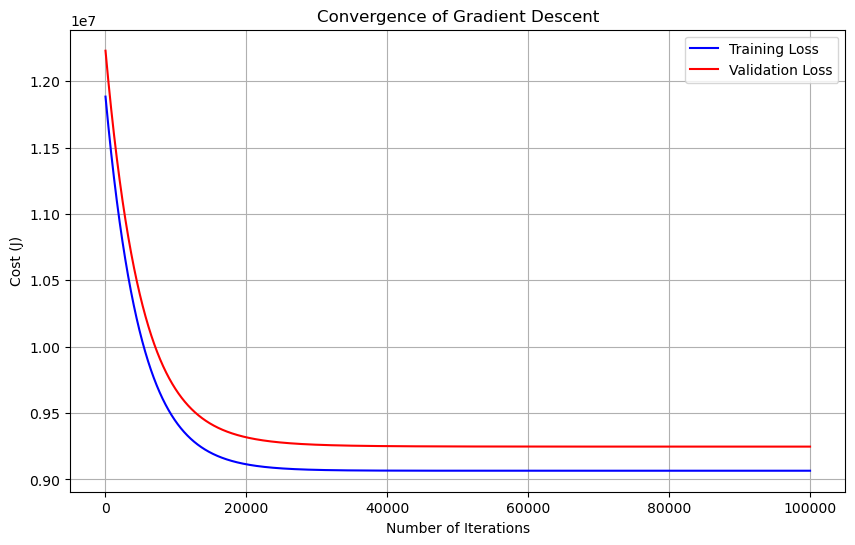

In [372]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')